magnitude: [[43.26661531 41.24501493 39.25702612 ... 16.51224091 17.7417236
  18.97366596]
 [40.4742425  38.55408605 36.66911978 ... 14.58569489 15.6724105
  16.76292952]
 [37.83927721 36.01187385 34.22127246 ... 12.77990176 13.72927196
  14.68410365]
 ...
 [15.40204207 14.07976948 12.77990176 ... 29.26033986 30.59764792
  31.95951971]
 [17.08203168 15.6724105  14.28266416 ... 31.95228232 33.4070584
  34.8850155 ]
 [18.97366596 17.46487207 15.97366896 ... 34.76622067 36.34581484
  37.94733192]]


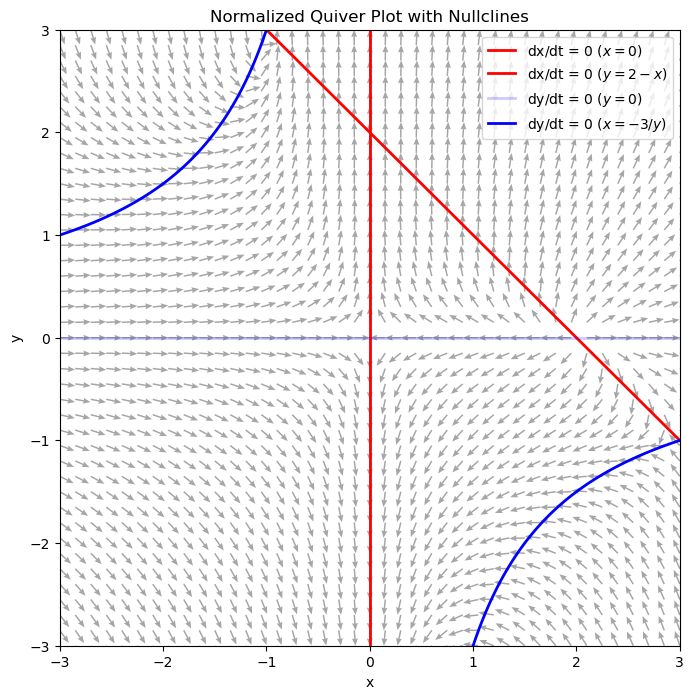

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return x**2 + x*y - 2*x

def g(x,y):
    return x*y**2 + 3*y

# --- Creating Grid ---
coords = np.linspace(-3, 3, 41)
x, y = np.meshgrid(coords, coords)
dxdt = f(x, y)
dydt = g(x, y)

# --- NORMALIZE THE VECTORS (THE FIX) ---
# 1. Calculate the magnitude (length) of each vector
magnitude = np.hypot(dxdt, dydt)
print("magnitude:", magnitude   )
# 2. Avoid division by zero at fixed points (where magnitude = 0)
#    We can set the magnitude to 1 at these points, since 0/1 = 0
magnitude[magnitude == 0] = 1.0 
# 3. Create normalized vectors (dxdt_n, dydt_n)
dxdt_n = dxdt / magnitude
dydt_n = dydt / magnitude

# --- Plotting Nullclines (Calculating) ---
# dxdt = 0  => x(x + y - 2) = 0  => x=0 or y=2-x
y_null = 2 - coords

# dxdt = 0  => y(xy + 3) = 0    => y=0 or x=-3/y
# We plot x = -3/y in two parts to avoid the 0-division
y_pos = np.linspace(0.1, 3, 100) # For y > 0
x_null_pos = -3 / y_pos
y_neg = np.linspace(-3, -0.1, 100) # For y < 0
x_null_neg = -3 / y_neg


# --- Plotting ---
plt.figure(figsize=(8, 8))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Normalized Quiver Plot with Nullclines')

# Plot the NORMALIZED quiver field
# We use dxdt_n and dydt_n
# A larger 'scale' (e.g., 40) makes the unit-length arrows smaller and tidier
plt.quiver(x, y, dxdt_n, dydt_n, scale=40, color='gray', alpha=0.7, headwidth=4, headlength=5)

# Plot Nullclines (dx/dt = 0 in red)
plt.axvline(0, color='red', linestyle='-', label='dx/dt = 0 ($x=0$)', linewidth=2)
plt.plot(coords, y_null, 'r', linestyle='-', label='dx/dt = 0 ($y=2-x$)', linewidth=2)

# Plot Nullclines (dy/dt = 0 in blue)
plt.axhline(0, color='b', linestyle='-', label='dy/dt = 0 ($y=0$)', linewidth=2, alpha=0.2)
# Plot the two parts of x = -3/y
plt.plot(x_null_pos, y_pos, 'b', linestyle='-', linewidth=2)
plt.plot(x_null_neg, y_neg, 'b', linestyle='-', label='dy/dt = 0 ($x=-3/y$)', linewidth=2)

plt.legend()
# Set limits to match your grid
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()